In [1]:
import matplotlib.pyplot as plt
import os
import json

In [2]:
from datasets import SemiInat2021

dataset = SemiInat2021("/ssd1/leco")


In [3]:
trainset, testset = dataset.get_dataset()

all_tp_info, leaf_idx_to_all_class_idx = dataset.get_class_hierarchy()

def get_unlabeled_class_count():
    key_map = {'kingdom': 0, 'phylum': 1}
    annotation_file = os.path.join('/ssd1/leco/', 'semi_inat', 'annotation_v2.json')
    if not os.path.exists(annotation_file):
        raise Exception(f"File {annotation_file} does not exist.")
    annotation_category = json.load(open(annotation_file, 'r'))
#     print(annotation_category['unlabeled_taxa'][0])
    
    unlabeled_class_count = {}
    for tp_name in ['kingdom', 'phylum']:
        print(tp_name)
        tp_info = all_tp_info[key_map[tp_name]]
        counter = {leaf_idx: 0 for leaf_idx in tp_info['idx_to_leaf_name']}
        for taxa in annotation_category['unlabeled_taxa']:
            counter[tp_info['leaf_name_to_idx'][taxa[tp_name]]] += 1
        unlabeled_class_count[tp_name] = counter

    return unlabeled_class_count

def get_labeled_class_count():
    
    labeled_class_count = {}
    for tp_info in all_tp_info:
        tp_name = tp_info['tp_name']
        print(f"Level ({tp_name})")
        labeled_class_count[tp_name] = {'train' : {}, 'test' : {}}
        tp_idx = tp_info['tp_idx']
        for name, sets in [['train', trainset], ['test', testset]]:
            print(f"\t{name}:")
            counter = {leaf_idx: 0 for leaf_idx in tp_info['idx_to_leaf_name']}
            for _, label in sets:
                leaf_idx = leaf_idx_to_all_class_idx[label][tp_idx]
#                 leaf_name = tp_info['idx_to_leaf_name'][leaf_idx]
                counter[leaf_idx] += 1
            labeled_class_count[tp_name][name] = counter
    return labeled_class_count

unlabeled_class_count = get_unlabeled_class_count()
labeled_class_count = get_labeled_class_count()
    

Animalia kingdom has 4 phylum
	Arthropoda phylum has 4 classes
		Insecta class has 10 orders
			Lepidoptera order has 21 family
				Erebidae family has 19 genus
					Sphingomorpha genus has 1 species
					Catocala genus has 4 species
					Macrobrochis genus has 1 species
					Ledaea genus has 1 species
					Halysidota genus has 1 species
					Seirarctia genus has 1 species
					Ophiusa genus has 1 species
					Olene genus has 1 species
					Asura genus has 1 species
					Diaphora genus has 1 species
					Zanclognatha genus has 1 species
					Spilosoma genus has 1 species
					Herminia genus has 1 species
					Grammodes genus has 1 species
					Cisthene genus has 1 species
					Forsebia genus has 1 species
					Chrysaeglia genus has 1 species
					Eudocima genus has 1 species
					Dasypodia genus has 1 species
				Choreutidae family has 1 genus
					Anthophila genus has 1 species
				Sphingidae family has 2 genus
					Hyles genus has 1 species
					Manduca genus has 1 species
				Noctui

kingdom
phylum
Level (kingdom)
	train:
	test:
Level (phylum)
	train:
	test:
Level (class)
	train:
	test:
Level (order)
	train:
	test:
Level (family)
	train:
	test:
Level (genus)
	train:
	test:
Level (species)
	train:
	test:


In [26]:
def ratio(counts):
    total = 0.
    for count in counts:
        total += counts[count]
    weight = 1/total
    for count in counts:
        counts[count] = weight * counts[count]
    return counts

def plot_labeled_vs_unlabeled(tp_name):
    unlabeled_class_count_tp = unlabeled_class_count[tp_name]
    labeled_class_count_tp_train = labeled_class_count[tp_name]['train']
    labeled_class_count_tp_test = labeled_class_count[tp_name]['test']
    
    labeled_class_ratio_tp_train = ratio(labeled_class_count_tp_train)
    labeled_class_ratio_tp_test = ratio(labeled_class_count_tp_test)
    unlabeled_class_ratio_tp = ratio(unlabeled_class_count_tp)
    sorted_indices = sorted(list(labeled_class_ratio_tp_train.keys()), key=lambda x: labeled_class_ratio_tp_train[x], reverse=True)
    
    plot_curve = {
        'train' : [labeled_class_ratio_tp_train[i] for i in sorted_indices],
        'test' : [labeled_class_ratio_tp_test[i] for i in sorted_indices],
        'unlabeled' : [unlabeled_class_ratio_tp[i] for i in sorted_indices],
    }
    
    colors = ['red', 'blue', 'yellow']
    for idx, curve_name in enumerate(plot_curve):
        curve = plot_curve[curve_name]
        color = colors[idx]
        plt.plot(curve, label=curve_name)
#     plt.yticks([0, 0.5, 1])
    plt.xticks(list(range(len(sorted_indices))))
    plt.ylabel('Class ratio')
    plt.ylim(0, 1)
    plt.title(tp_name)
    plt.legend()
    plt.show()

def plot_labeled(tp_name):
    labeled_class_count_tp_train = labeled_class_count[tp_name]['train']
    labeled_class_count_tp_test = labeled_class_count[tp_name]['test']
    
    labeled_class_ratio_tp_train = ratio(labeled_class_count_tp_train)
    labeled_class_ratio_tp_test = ratio(labeled_class_count_tp_test)
#     import pdb; pdb.set_trace()
    sorted_indices = sorted(list(labeled_class_ratio_tp_train.keys()), key=lambda x: labeled_class_ratio_tp_train[x], reverse=True)
    
    plot_curve = {
        'train' : [labeled_class_ratio_tp_train[i] for i in sorted_indices],
        'test' : [labeled_class_ratio_tp_test[i] for i in sorted_indices],
    }
    
    colors = ['red', 'blue']
    for idx, curve_name in enumerate(plot_curve):
        curve = plot_curve[curve_name]
        color = colors[idx]
        plt.plot(curve, label=curve_name)
#     plt.yticks([0, 0.5, 1])
#     plt.xticks(list(range(len(sorted_indices))))
    plt.ylabel('Class ratio')
    max_ratio = max(plot_curve['train'][0], plot_curve['test'][0])
#     print(max_ratio)
    plt.ylim(0, max_ratio+0.1*max_ratio)
    plt.title(tp_name)
    plt.legend()
    plt.show()


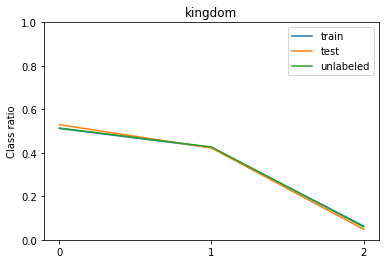

In [27]:
plot_labeled_vs_unlabeled('kingdom')


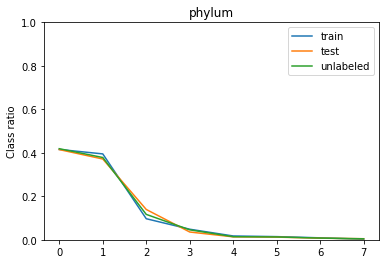

In [28]:
plot_labeled_vs_unlabeled('phylum')

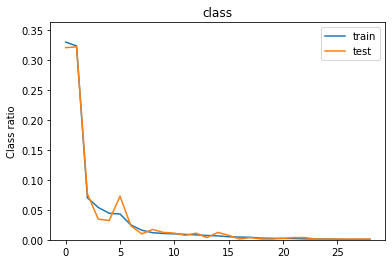

In [29]:
plot_labeled('class')


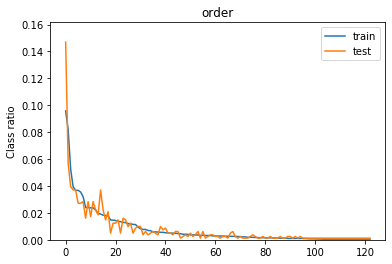

In [30]:
plot_labeled('order')


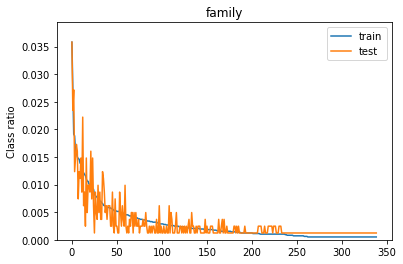

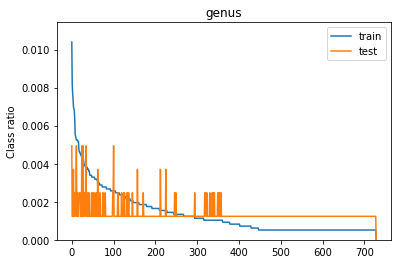

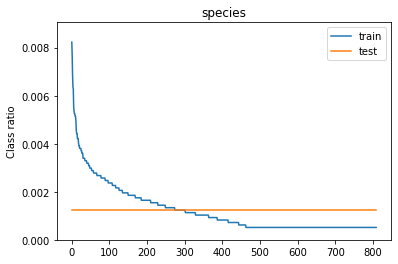

In [31]:
plot_labeled('family')
plot_labeled('genus')
plot_labeled('species')